# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file =pd.read_csv(r"C:\Users\arnol\gt-virt-atl-data-pt-09-2021-u-c\02-Homework\06-Python-APIs\Instructions\output_data\cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_data = []

clouds = []
countries = []
dates = []
humidity = []
latitudes = []
longitudes = []
temperature =[]
windspeeds = []

temp_units = "imperial"


In [4]:
# Starting URL for Weather Map
#base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# define url
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api}&units={temp_units}&q="

print("Beginning Data Retrieval   ")
print("---------------------------")

# Record counters

record_counter = 1
set_counter = 1 
    
for index, city in enumerate(cities):
    
    if record_counter > 49:
            record_counter = 1
            set_counter += 1
    city_url = base_url +  city    
    
    print(f"Processing Record {record_counter} of Set {set_counter} : {city}")

    record_counter +=1
    
    try:
        response = requests.get(city_url).json()
        latitudes = response["coord"]["lat"]
        longitudes = response["coord"]["lon"]
        temperature = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        clouds = response["clouds"]["all"]
        windspeeds = response["wind"]["speed"]
        countries = response["sys"]["country"]
        dates = response["dt"]
        
        city_data.append({"City": city, 
                          "Lat": latitudes, 
                          "Lng": longitudes, 
                          "Max Temp": temperature,
                          "Humidity": humidity,
                          "Clouds": clouds,
                          "Wind Speed": windspeeds,
                          "Country": countries,
                          "Date": dates})
         

    except(KeyError, IndexError):
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 : faanui
Processing Record 2 of Set 1 : meyungs
City not found. Skipping...
Processing Record 3 of Set 1 : saint anthony
Processing Record 4 of Set 1 : albany
Processing Record 5 of Set 1 : busselton
Processing Record 6 of Set 1 : jalu
Processing Record 7 of Set 1 : ushuaia
Processing Record 8 of Set 1 : airai
Processing Record 9 of Set 1 : verkhoyansk
Processing Record 10 of Set 1 : bredasdorp
Processing Record 11 of Set 1 : butaritari
Processing Record 12 of Set 1 : carutapera
Processing Record 13 of Set 1 : chengde
Processing Record 14 of Set 1 : kirakira
Processing Record 15 of Set 1 : sao filipe
Processing Record 16 of Set 1 : aklavik
Processing Record 17 of Set 1 : khatanga
Processing Record 18 of Set 1 : litein
Processing Record 19 of Set 1 : inhambane
Processing Record 20 of Set 1 : tumannyy
City not found. Skipping...
Processing Record 21 of Set 1 : rikitea
Processing Record 22 of Set 1 : port

City not found. Skipping...
Processing Record 40 of Set 4 : hervey bay
Processing Record 41 of Set 4 : fortuna
Processing Record 42 of Set 4 : shuangyang
Processing Record 43 of Set 4 : tasiilaq
Processing Record 44 of Set 4 : skalistyy
City not found. Skipping...
Processing Record 45 of Set 4 : blois
Processing Record 46 of Set 4 : atuona
Processing Record 47 of Set 4 : bastrop
Processing Record 48 of Set 4 : yangambi
Processing Record 49 of Set 4 : san vicente
Processing Record 1 of Set 5 : bilma
Processing Record 2 of Set 5 : coihaique
Processing Record 3 of Set 5 : florianopolis
Processing Record 4 of Set 5 : coquimbo
Processing Record 5 of Set 5 : saint-pierre
Processing Record 6 of Set 5 : kavaratti
Processing Record 7 of Set 5 : nuuk
Processing Record 8 of Set 5 : canora
Processing Record 9 of Set 5 : soc trang
Processing Record 10 of Set 5 : longlac
City not found. Skipping...
Processing Record 11 of Set 5 : saqqez
Processing Record 12 of Set 5 : smidovich
Processing Record 13 

Processing Record 31 of Set 8 : shaoyang
Processing Record 32 of Set 8 : shakawe
Processing Record 33 of Set 8 : hami
Processing Record 34 of Set 8 : marcona
City not found. Skipping...
Processing Record 35 of Set 8 : port moresby
Processing Record 36 of Set 8 : kizilskoye
Processing Record 37 of Set 8 : eidsvag
Processing Record 38 of Set 8 : tunduru
City not found. Skipping...
Processing Record 39 of Set 8 : bonthe
Processing Record 40 of Set 8 : velizh
Processing Record 41 of Set 8 : cururupu
Processing Record 42 of Set 8 : bilibino
Processing Record 43 of Set 8 : fjerritslev
Processing Record 44 of Set 8 : samalaeulu
City not found. Skipping...
Processing Record 45 of Set 8 : makakilo city
Processing Record 46 of Set 8 : puerto varas
Processing Record 47 of Set 8 : pedasi
Processing Record 48 of Set 8 : lavrentiya
Processing Record 49 of Set 8 : aktash
Processing Record 1 of Set 9 : neiafu
Processing Record 2 of Set 9 : say
Processing Record 3 of Set 9 : champerico
Processing Recor

Processing Record 21 of Set 12 : vermillion
Processing Record 22 of Set 12 : visby
Processing Record 23 of Set 12 : conop
Processing Record 24 of Set 12 : kurilsk
Processing Record 25 of Set 12 : trat
Processing Record 26 of Set 12 : nenjiang
Processing Record 27 of Set 12 : bereda
Processing Record 28 of Set 12 : lagoa
Processing Record 29 of Set 12 : vestmannaeyjar
Processing Record 30 of Set 12 : estelle
Processing Record 31 of Set 12 : wodonga
Processing Record 32 of Set 12 : bucerias
Processing Record 33 of Set 12 : suntar
Processing Record 34 of Set 12 : sambava
Processing Record 35 of Set 12 : pisco
Processing Record 36 of Set 12 : villa carlos paz
Processing Record 37 of Set 12 : pilu
Processing Record 38 of Set 12 : balkanabat
Processing Record 39 of Set 12 : zhetybay
City not found. Skipping...
Processing Record 40 of Set 12 : kristiansund
Processing Record 41 of Set 12 : labutta
City not found. Skipping...
Processing Record 42 of Set 12 : olinda
Processing Record 43 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=bb28db890d179b00645c68351bef6740&units=imperial&q=velikie luki'

In [6]:
# Convert array of JSONs into Pandas DataFrame
weather_pd = pd.DataFrame(city_data)

# Show Record Count
weather_pd.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Clouds        576
Wind Speed    576
Country       576
Date          576
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_pd

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,faanui,-16.4833,-151.7500,81.37,77,100,18.81,PF,1644288526
1,saint anthony,45.0205,-93.2180,16.14,73,0,9.22,US,1644288327
2,albany,42.6001,-73.9662,35.82,92,100,1.25,US,1644288528
3,busselton,-33.6500,115.3333,74.05,64,91,8.10,AU,1644288528
4,jalu,29.0331,21.5482,56.44,29,3,4.61,LY,1644288528
...,...,...,...,...,...,...,...,...,...
571,ludvika,60.1496,15.1878,35.04,91,100,13.62,SE,1644288691
572,yushu,44.8000,126.5333,17.04,78,13,8.48,CN,1644288691
573,yar-sale,66.8333,70.8333,0.77,88,100,16.40,RU,1644288692
574,hualmay,-11.0964,-77.6139,70.45,80,100,7.31,PE,1644288692


In [8]:
weather_pd.describe()

,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,20.697994,16.501652,50.217969,74.604167,56.977431,7.748073,1.644289e+09
std,33.022927,88.975631,29.925821,20.145633,41.214407,6.759466,9.755772e+01
min,-54.800000,-175.200000,-42.720000,10.000000,0.000000,0.000000,1.644288e+09
25%,-6.486150,-64.248275,31.067500,65.000000,9.750000,3.440000,1.644289e+09
50%,24.223650,21.699100,59.720000,78.000000,73.500000,5.920000,1.644289e+09
75%,48.225050,92.695025,74.730000,91.000000,100.000000,9.742500,1.644289e+09
max,78.218600,179.316700,96.220000,100.000000,100.000000,51.560000,1.644289e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_data = weather_pd[(weather_pd["Humidity"]> 100)].index

humidity_data

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

no_humidity_data = weather_pd.drop(humidity_data, inplace=False)
no_humidity_data.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,faanui,-16.4833,-151.7500,81.37,77,100,18.81,PF,1644288526
1,saint anthony,45.0205,-93.2180,16.14,73,0,9.22,US,1644288327
2,albany,42.6001,-73.9662,35.82,92,100,1.25,US,1644288528
3,busselton,-33.6500,115.3333,74.05,64,91,8.10,AU,1644288528
4,jalu,29.0331,21.5482,56.44,29,3,4.61,LY,1644288528


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

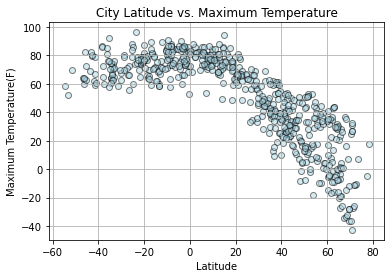

In [11]:

plt.scatter(weather_pd["Lat"], weather_pd["Max Temp"], color = "lightblue", edgecolor="black", linewidths=1, alpha=0.5)
plt.title("City Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature(F)")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

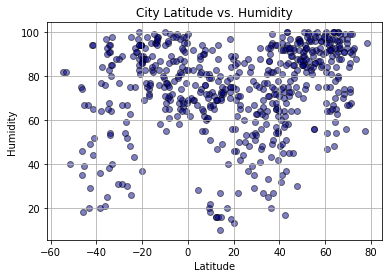

In [12]:
#Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_pd["Lat"], weather_pd["Humidity"], color = "darkblue", edgecolor = "black", linewidth=1, alpha=0.5)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True )

## Latitude vs. Cloudiness Plot

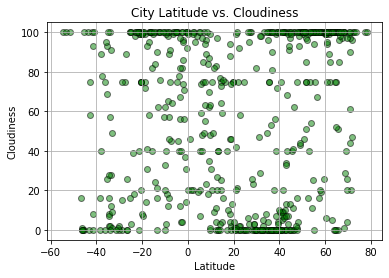

In [13]:
plt.scatter(weather_pd["Lat"], weather_pd["Clouds"], color = "green", edgecolor = "black", linewidth=1, alpha=0.5)

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True )

## Latitude vs. Wind Speed Plot

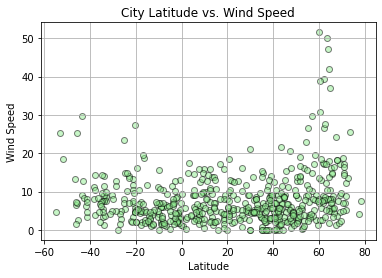

In [14]:
plt.scatter(weather_pd["Lat"], weather_pd["Wind Speed"], color = "lightgreen", edgecolor = "black", linewidth=1, alpha=0.5)

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Define function for creating linear agression and scatter plot
def linear_regression(x_values,y_values):
  
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r_value is: {rvalue**2}")
    plt.show()
  

In [16]:
northern_hem_pd = weather_pd.loc[(weather_pd["Lat"] >= 0)]
southern_hem_pd = weather_pd.loc[(weather_pd["Lat"] < 0)]


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

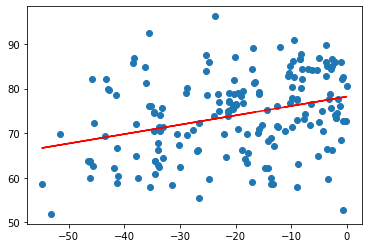

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hem_pd["Lat"]
y_values = southern_hem_pd["Max Temp"]
linear_regression(x_values, y_values)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

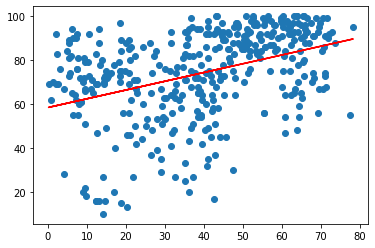

In [18]:
x_values = northern_hem_pd["Lat"]
y_values = northern_hem_pd["Humidity"]
linear_regression(x_values, y_values)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

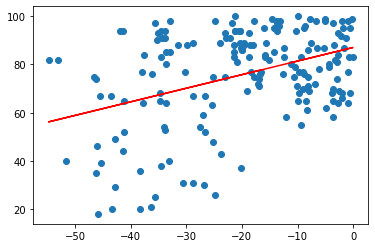

In [19]:
x_values = southern_hem_pd["Lat"]
y_values = southern_hem_pd["Humidity"]
linear_regression(x_values, y_values)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

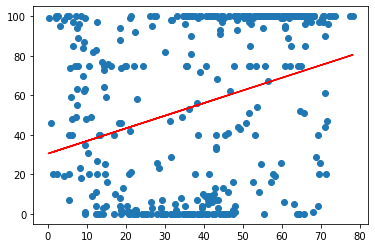

In [20]:
x_values = northern_hem_pd["Lat"]
y_values = northern_hem_pd["Clouds"]
linear_regression(x_values, y_values)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

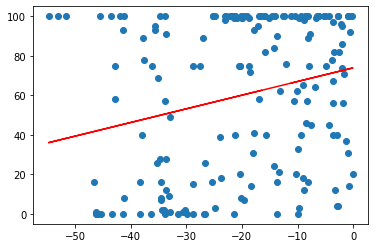

In [21]:
x_values = southern_hem_pd["Lat"]
y_values = southern_hem_pd["Clouds"]
linear_regression(x_values, y_values)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

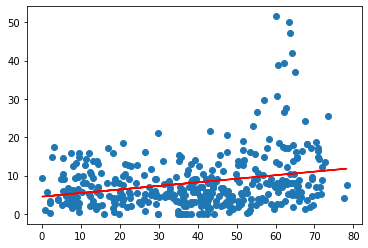

In [22]:
x_values = northern_hem_pd["Lat"]
y_values = northern_hem_pd["Wind Speed"]
linear_regression(x_values, y_values)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

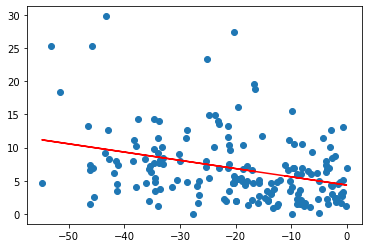

In [23]:
x_values = southern_hem_pd["Lat"]
y_values = southern_hem_pd["Wind Speed"]
linear_regression(x_values, y_values)